### Check available data

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

#### Read a World Ocean Database (WOD) nc file (rectangle near to the eastern part of the Wadden Sea) which is produced by Ocean Data Viewer (ODV), var1 is depth

In [2]:
ds = xr.open_dataset('wadden_sea.nc')
df = ds.to_dataframe()
df = df[(df.date_time > '2000-01-01 00:00:00.0')]
df = df[['longitude', 'latitude', 'date_time'
        ,'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7'
        ,'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14']]
df.columns = ['longitude', 'latitude', 'date_time'
             ,'Depth', 'Temperature', 'Salinity', 'Oxygen', 'Phosphate', 'Silicate', 'Nitrate'
             ,'Nitrite', 'pH', 'Chlorophyll a', 'Plankton biomass', 'Alkalinity', 'NO2+NO3', 'pCO2']
df['Oxygen'] = df['Oxygen']*44.661 # 1 ml/l = 10^3/22.391 = 44.661 μmol/l
df['Day of year'] = df.date_time.dt.dayofyear.values

In [3]:
df_01to10 = df[(df.Depth < 10)]
df_10to20 = df[(df.Depth >= 10) & (df.Depth < 20)]
df_20to30 = df[(df.Depth >= 20) & (df.Depth < 30)]
df_30to40 = df[(df.Depth >= 30) & (df.Depth < 40)]

In [4]:
def process_data(item):
    item = item.groupby(['Day of year']).mean()
    item = item.reindex(index=range(1,366))
    item = item.interpolate(method='linear',limit_direction='forward')
    item.loc[0:16,:] = item[-1:].values
    item.loc[0:16,'Chlorophyll a'] = 0
    item = item.interpolate(method='linear',limit_direction='both')
    item = item.rolling(window=16).mean()
    item = item.interpolate(method='linear',limit_direction='both')
    
    return item

In [5]:
dflist = list(map(process_data, [df_01to10, df_10to20, df_20to30, df_30to40]))

dflist contains 4 arrays of data averaged through 0-10, 10-20, 20-30, 30-40 m respectively; checking them it is clear that we do not have enough data in the layers apart from the top layer

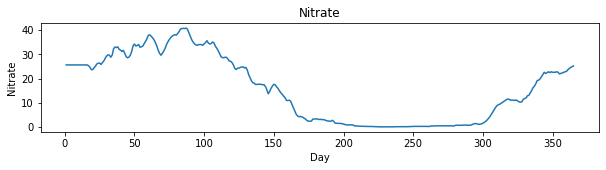

In [6]:
item = dflist[0]
name = 'Nitrate'
plt.plot(item.index, item[name]); plt.gcf().set_size_inches(10,2);
plt.title(name); plt.xlabel('Day'); plt.ylabel(name);